# Trabalho de análise de base de dados de League of Legends

## Importação das bibliotecas e das bases de dados

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import scipy.stats as stats
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler 
import random
from scipy.stats import norm
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("LeagueDatabase.csv")

In [5]:
df.head(10)

name              tags     partype  attack  defense  magic  \
0      Annie      Mage,Support        Mana       2        3     10   
1      Kayle     Mage,Marksman        Mana       6        6      7   
2     Xerath      Mage,Support        Mana       1        3     10   
3    Shyvana      Fighter,Mage       Fúria       8        6      3   
4       Ahri     Mage,Assassin        Mana       3        4      8   
5     Graves          Marksman        Mana       8        5      3   
6       Fizz  Assassin,Fighter        Mana       6        4      7   
7   Volibear      Fighter,Tank        Mana       7        7      4   
8     Rengar  Assassin,Fighter  Ferocidade       7        4      2   
9  Master Yi  Assassin,Fighter        Mana      10        4      2   

   difficulty  skins  id   hp  ...  mpregenperlevel  crit  critperlevel  \
0           6     18   1  560  ...                1     0             0   
1           7     17  10  670  ...                1     0             0   
2           8      9  85  596  ...                1     0             0   
3           4      9  86  665  ...                0     0             0   
4           5     20  87  590  ...                1     0             0   
5           3     14  88  625  ...                1     0             0   
6           6     14  89  640  ...                1     0             0   
7           3     10  90  650  ...                1     0             0   
8           8      9  91  590  ...                0     0             0   
9           4     17  11  669  ...                0     0             0   

   attackdamage  attackdamageperlevel  attackspeedperlevel  attackspeed  \
0            50                     3                    1            1   
1            50                     3                    2            1   
2            55                     3                    1            1   
3            66                     3                    3            1   
4            53                     3                    2            1   
5            68                     4                    3            0   
6            58                     3                    3            1   
7            60                     4                    2            1   
8            68                     3                    3            1   
9            65                     3                    3            1   

   winrate  pickrate  banrate  
0    50.30      1.17     0.32  
1    51.48      2.46     0.59  
2    51.38      5.10     6.88  
3    52.78      2.80     1.07  
4    50.74     13.16     5.99  
5    51.36     12.88    12.29  
6    50.71      4.47     6.67  
7    51.97      4.49     3.30  
8    45.32      1.49     1.02  
9    49.28      5.35     9.44  

[10 rows x 32 columns]

In [8]:
df.columns

Index(['name', 'tags', 'partype', 'attack', 'defense', 'magic', 'difficulty',
       'skins', 'id', 'hp', 'hpperlevel', 'mp', 'mpperlevel', 'movespeed',
       'armor', 'armorperlevel', 'spellblock', 'spellblockperlevel',
       'attackrange', 'hpregen', 'hpregenperlevel', 'mpregen',
       'mpregenperlevel', 'crit', 'critperlevel', 'attackdamage',
       'attackdamageperlevel', 'attackspeedperlevel', 'attackspeed', 'winrate',
       'pickrate', 'banrate'],
      dtype='object')

Descricao das colunas
- name: nome do campeão
- tags: classes em que ele se encaixa
- partype: o que ele consome para conjurar habilidades
- attack, defense, magic: escala de 0 a 10 do quanto o campeão se encaixa nesses estilos de jogo
- dificulty: escala de 0 a 10 da dificuldade de uso do campeão
- skins: quantidade de 'skins' que o campeão tem no jogo
- hp: vida inicial do campeão
- hpperlevel: o quanto de vida o campeão ganha a cada nível que sobre
- mp: pontos de mana
- mpperlevel: o quanto de mana o campeão ganha a cada nível que sobre
- movespeed: o quão rápido o campeão se move no nivel inicial(por bloco de jogo)
- armor: resistencia a dano físico inicial do campeão
- armorperlevel: o quanto de resistencia a dano físico o campeão ganha a cada nível que sobre
- spellblock: resistencia a magia inicial do campeão
- spellblockperlevel: o quanto de resistencia a magia o campeão ganha a cada nível que sobre
- attackrange: a distância em que o campeão consegue executar ataques básicos
- hpregen: regeneração de vida inicial do campeão
- hpregenperlevel: o quanto de regeneração de vida o campeão ganha a cada nível que sobre
- mpregen: regeneração de mana inicial do campeão
- mpregenperlevel: o quanto de regeneração de mana o campeão ganha a cada nível que sobre
- crit: chance de critico inicial do campeão
- critperlevel: o quanto de chance critico o campeão ganha a cada nível que sobre
- attackdamage: dano de ataque inicial do campeão
- attackdamageperlevel: o quanto de dano de ataque o campeão ganha a cada nível que sobre
- attackspeed: o quanto de velocidade de ataque básico o campeão tem inicialmente
- attackspeedperlevel: o quanto de velocidade de ataque básico o campeão ganha a cada nível que sobe
- winrate: taxa de vitória do campeão
- pickrate: taxa de escolha do campeão
- banrate: taxa de banimento do campeão

## Limpeza do dataset

In [13]:
df.drop(["id", "tags", "crit", "critperlevel", "attackspeed", "attackspeedperlevel"], axis=1, inplace=True)

In [15]:
df_limpo = df.copy()

In [17]:
df_limpo.isnull().sum()

name                    0
partype                 1
attack                  0
defense                 0
magic                   0
difficulty              0
skins                   0
hp                      0
hpperlevel              0
mp                      0
mpperlevel              0
movespeed               0
armor                   0
armorperlevel           0
spellblock              0
spellblockperlevel      0
attackrange             0
hpregen                 0
hpregenperlevel         0
mpregen                 0
mpregenperlevel         0
attackdamage            0
attackdamageperlevel    0
winrate                 0
pickrate                0
banrate                 0
dtype: int64

In [19]:
#belveth
df_limpo.loc[df_limpo["partype"].isnull(), :]

name partype  attack  defense  magic  difficulty  skins   hp  \
49  Bel'Veth     NaN       4        2      7          10      4  610   

    hpperlevel  mp  ...  attackrange  hpregen  hpregenperlevel  mpregen  \
49          99  60  ...          150        6                1        0   

    mpregenperlevel  attackdamage  attackdamageperlevel  winrate  pickrate  \
49                0            60                     2    49.15      1.57   

    banrate  
49     1.67  

[1 rows x 26 columns]

In [21]:
df_limpo["partype"].fillna(value="Nenhum", inplace=True)

In [23]:
df_limpo.isnull().sum()

name                    0
partype                 0
attack                  0
defense                 0
magic                   0
difficulty              0
skins                   0
hp                      0
hpperlevel              0
mp                      0
mpperlevel              0
movespeed               0
armor                   0
armorperlevel           0
spellblock              0
spellblockperlevel      0
attackrange             0
hpregen                 0
hpregenperlevel         0
mpregen                 0
mpregenperlevel         0
attackdamage            0
attackdamageperlevel    0
winrate                 0
pickrate                0
banrate                 0
dtype: int64

In [25]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  169 non-null    object 
 1   partype               169 non-null    object 
 2   attack                169 non-null    int64  
 3   defense               169 non-null    int64  
 4   magic                 169 non-null    int64  
 5   difficulty            169 non-null    int64  
 6   skins                 169 non-null    int64  
 7   hp                    169 non-null    int64  
 8   hpperlevel            169 non-null    int64  
 9   mp                    169 non-null    int64  
 10  mpperlevel            169 non-null    int64  
 11  movespeed             169 non-null    int64  
 12  armor                 169 non-null    int64  
 13  armorperlevel         169 non-null    int64  
 14  spellblock            169 non-null    int64  
 15  spellblockperlevel    1

In [27]:
#Erro detectado durante análise exploratória
df_limpo.loc[df_limpo["name"] == "Viego", "mp"] = 0

## Análise exploratória

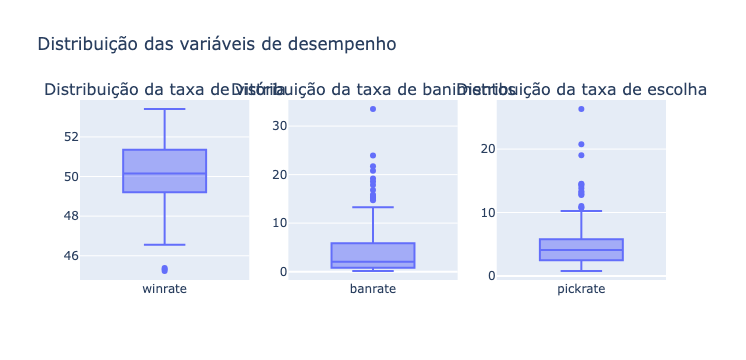

In [30]:
fig1 = px.box(df_limpo["winrate"])
fig2 = px.box(df_limpo["banrate"])
fig3 = px.box(df_limpo["pickrate"])

fig = make_subplots(rows=1, cols=3, subplot_titles=["Distribuição da taxa de vitória", "Distribuição da taxa de banimentos", "Distribuição da taxa de escolha"])
fig.add_trace(fig1.data[0], row=1, col=1)  
fig.add_trace(fig2.data[0], row=1, col=2)  
fig.add_trace(fig3.data[0], row=1, col=3)

fig.update_layout(title_text="Distribuição das variáveis de desempenho")
fig.show()

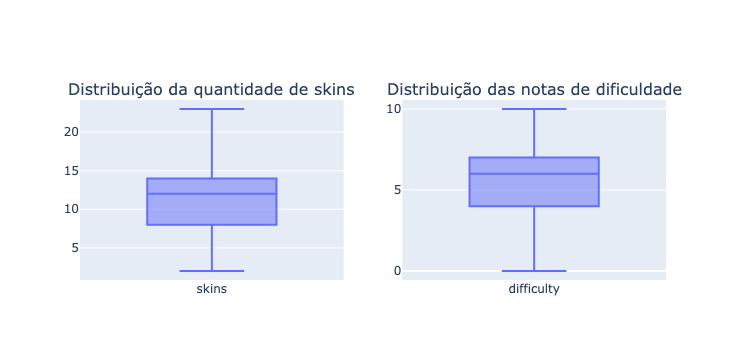

In [32]:
fig1 = px.box(df_limpo["skins"])
fig2 = px.box(df_limpo["difficulty"])

fig = make_subplots(rows=1, cols=2, subplot_titles=["Distribuição da quantidade de skins", "Distribuição das notas de dificuldade"])
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)  

fig.update_layout()
fig.show()

### Histogramas

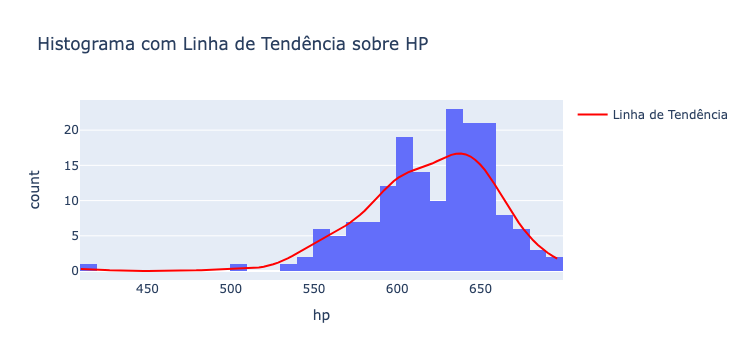

In [269]:
# Criando o histograma sem normalizar a densidade
fig = px.histogram(df_limpo, x="hp", nbins=30, title='Histograma com Linha de Tendência sobre HP')

# Calculando a densidade de kernel usando scipy
x_vals = np.linspace(df_limpo["hp"].min(), df_limpo["hp"].max(), 100)
densidade = stats.gaussian_kde(df_limpo["hp"])
y_vals = densidade(x_vals)

# Ajustando a escala da linha de densidade ao histograma
# Multiplicando pela área total do histograma para que as escalas fiquem compatíveis
bin_width = (df_limpo["hp"].max() - df_limpo["hp"].min()) / 30  # Largura de cada bin
y_vals = y_vals * len(df_limpo["hp"]) * bin_width

# Adicionando a linha de tendência como um scatter plot
fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Linha de Tendência', line=dict(color='red')))

# Exibindo o gráfico
fig.show()


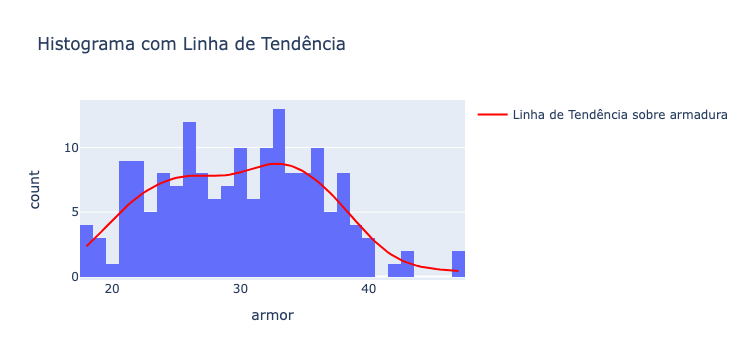

In [271]:
# Criando o histograma sem normalizar a densidade
fig = px.histogram(df_limpo, x="armor", nbins=30, title='Histograma com Linha de Tendência')

# Calculando a densidade de kernel usando scipy
x_vals = np.linspace(df_limpo["armor"].min(), df_limpo["armor"].max(), 100)
densidade = stats.gaussian_kde(df_limpo["armor"])
y_vals = densidade(x_vals)

# Ajustando a escala da linha de densidade ao histograma
# Multiplicando pela área total do histograma para que as escalas fiquem compatíveis
bin_width = (df_limpo["armor"].max() - df_limpo["armor"].min()) / 30  # Largura de cada bin
y_vals = y_vals * len(df_limpo["armor"]) * bin_width

# Adicionando a linha de tendência como um scatter plot
fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Linha de Tendência sobre armadura', line=dict(color='red')))

# Exibindo o gráfico
fig.show()

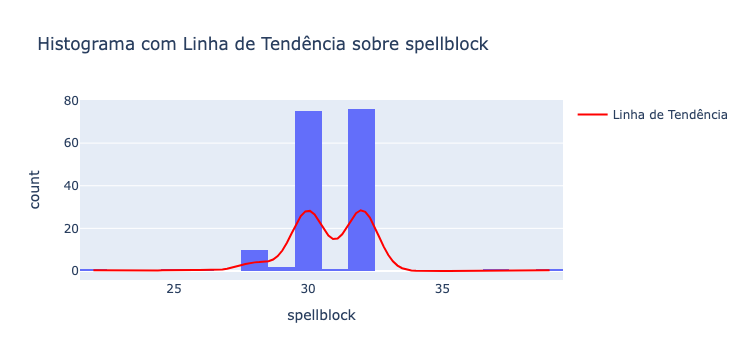

In [277]:
# Criando o histograma sem normalizar a densidade
fig = px.histogram(df_limpo, x="spellblock", nbins=30, title='Histograma com Linha de Tendência sobre spellblock')

# Calculando a densidade de kernel usando scipy
x_vals = np.linspace(df_limpo["spellblock"].min(), df_limpo["spellblock"].max(), 100)
densidade = stats.gaussian_kde(df_limpo["spellblock"])
y_vals = densidade(x_vals)

# Ajustando a escala da linha de densidade ao histograma
# Multiplicando pela área total do histograma para que as escalas fiquem compatíveis
bin_width = (df_limpo["spellblock"].max() - df_limpo["spellblock"].min()) / 30  # Largura de cada bin
y_vals = y_vals * len(df_limpo["spellblock"]) * bin_width

# Adicionando a linha de tendência como um scatter plot
fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Linha de Tendência', line=dict(color='red')))

# Exibindo o gráfico
fig.show()

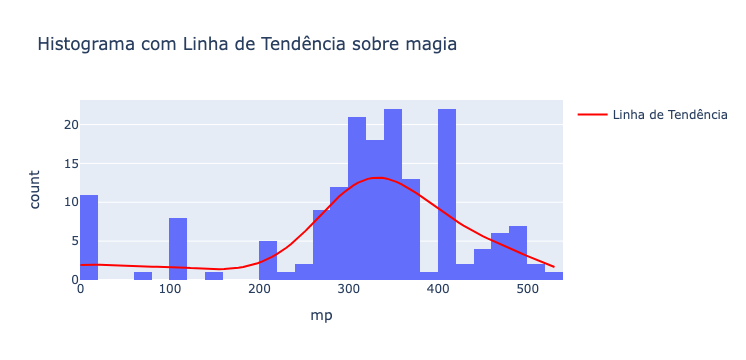

In [324]:
# Criando o histograma sem normalizar a densidade
fig = px.histogram(df_limpo, x="mp", nbins=30, title='Histograma com Linha de Tendência sobre magia')

# Calculando a densidade de kernel usando scipy
x_vals = np.linspace(df_limpo["mp"].min(), df_limpo["mp"].max(), 100)
densidade = stats.gaussian_kde(df_limpo["mp"])
y_vals = densidade(x_vals)

# Ajustando a escala da linha de densidade ao histograma
# Multiplicando pela área total do histograma para que as escalas fiquem compatíveis
bin_width = (df_limpo["mp"].max() - df_limpo["mp"].min()) / 30  # Largura de cada bin
y_vals = y_vals * len(df_limpo["mp"]) * bin_width

# Adicionando a linha de tendência como um scatter plot
fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Linha de Tendência', line=dict(color='red')))

# Exibindo o gráfico
fig.show()

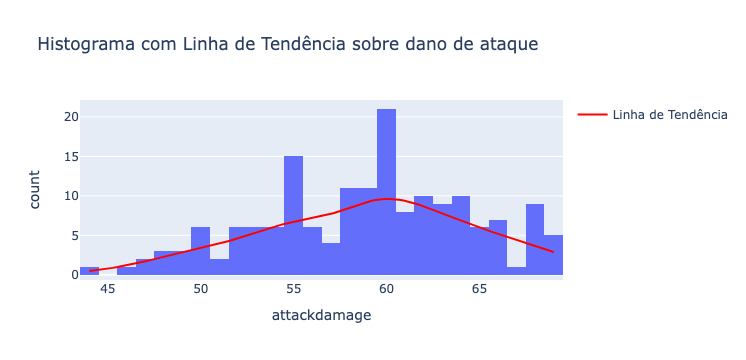

In [285]:
# Criando o histograma sem normalizar a densidade
fig = px.histogram(df_limpo, x="attackdamage", nbins=30, title='Histograma com Linha de Tendência sobre dano de ataque')

# Calculando a densidade de kernel usando scipy
x_vals = np.linspace(df_limpo["attackdamage"].min(), df_limpo["attackdamage"].max(), 100)
densidade = stats.gaussian_kde(df_limpo["attackdamage"])
y_vals = densidade(x_vals)

# Ajustando a escala da linha de densidade ao histograma
# Multiplicando pela área total do histograma para que as escalas fiquem compatíveis
bin_width = (df_limpo["attackdamage"].max() - df_limpo["attackdamage"].min()) / 30  # Largura de cada bin
y_vals = y_vals * len(df_limpo["attackdamage"]) * bin_width

# Adicionando a linha de tendência como um scatter plot
fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Linha de Tendência', line=dict(color='red')))

# Exibindo o gráfico
fig.show()

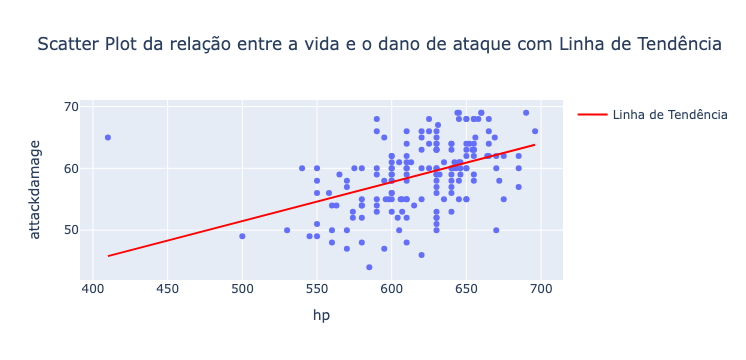

In [287]:
# Criando o scatter plot com plotly.express
fig = px.scatter(df_limpo, x="hp", y="attackdamage", title='Scatter Plot da relação entre a vida e o dano de ataque com Linha de Tendência')

# Calculando a linha de regressão
x = df_limpo["hp"]
y = df_limpo["attackdamage"]
coef = np.polyfit(x, y, 1)  # Ajuste linear (1º grau)
linha_tendencia = np.poly1d(coef)

# Criando os valores da linha de tendência
x_vals = np.linspace(x.min(), x.max(), 100)
y_vals = linha_tendencia(x_vals)

# Adicionando a linha de tendência ao gráfico
fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Linha de Tendência', line=dict(color='red')))

# Exibindo o gráfico
fig.show()

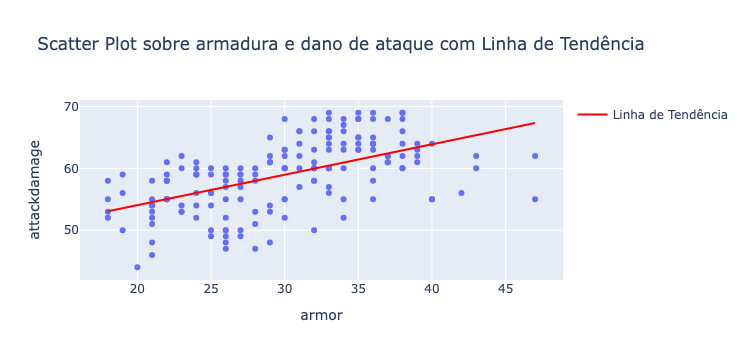

In [289]:
# Criando o scatter plot com plotly.express
fig = px.scatter(df_limpo, x="armor", y="attackdamage", title='Scatter Plot sobre armadura e dano de ataque com Linha de Tendência')

# Calculando a linha de regressão
x = df_limpo["armor"]
y = df_limpo["attackdamage"]
coef = np.polyfit(x, y, 1)  # Ajuste linear (1º grau)
linha_tendencia = np.poly1d(coef)

# Criando os valores da linha de tendência
x_vals = np.linspace(x.min(), x.max(), 100)
y_vals = linha_tendencia(x_vals)

# Adicionando a linha de tendência ao gráfico
fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Linha de Tendência', line=dict(color='red')))

# Exibindo o gráfico
fig.show()

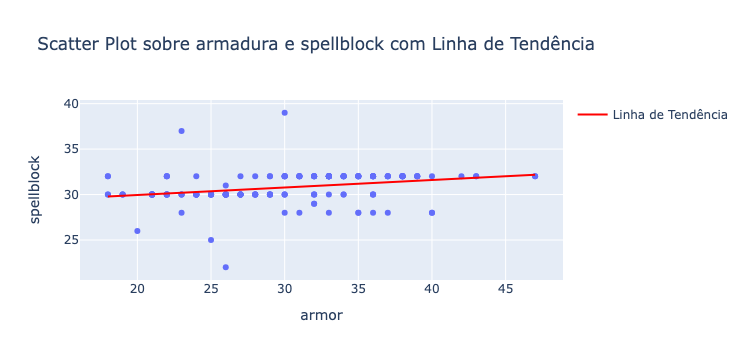

In [291]:
px.scatter(df_limpo, x="armor", y="spellblock")
# Criando o scatter plot com plotly.express
fig = px.scatter(df_limpo, x="armor", y="spellblock", title='Scatter Plot sobre armadura e spellblock com Linha de Tendência')

# Calculando a linha de regressão
x = df_limpo["armor"]
y = df_limpo["spellblock"]
coef = np.polyfit(x, y, 1)  # Ajuste linear (1º grau)
linha_tendencia = np.poly1d(coef)

# Criando os valores da linha de tendência
x_vals = np.linspace(x.min(), x.max(), 100)
y_vals = linha_tendencia(x_vals)

# Adicionando a linha de tendência ao gráfico
fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Linha de Tendência', line=dict(color='red')))

# Exibindo o gráfico
fig.show()

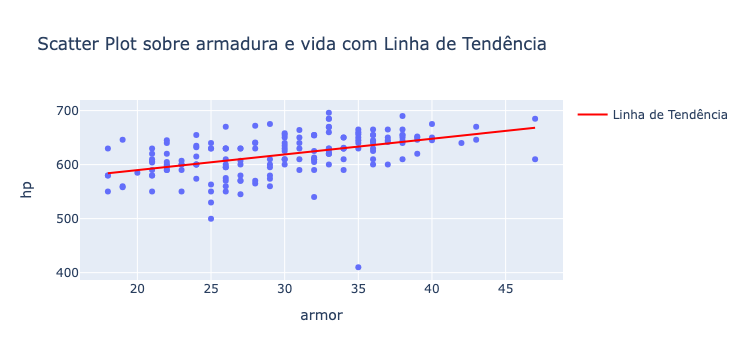

In [293]:
px.scatter(df_limpo, x="armor", y="hp")
# Criando o scatter plot com plotly.express
fig = px.scatter(df_limpo, x="armor", y="hp", title='Scatter Plot sobre armadura e vida com Linha de Tendência')

# Calculando a linha de regressão
x = df_limpo["armor"]
y = df_limpo["hp"]
coef = np.polyfit(x, y, 1)  # Ajuste linear (1º grau)
linha_tendencia = np.poly1d(coef)

# Criando os valores da linha de tendência
x_vals = np.linspace(x.min(), x.max(), 100)
y_vals = linha_tendencia(x_vals)

# Adicionando a linha de tendência ao gráfico
fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Linha de Tendência', line=dict(color='red')))

# Exibindo o gráfico
fig.show()

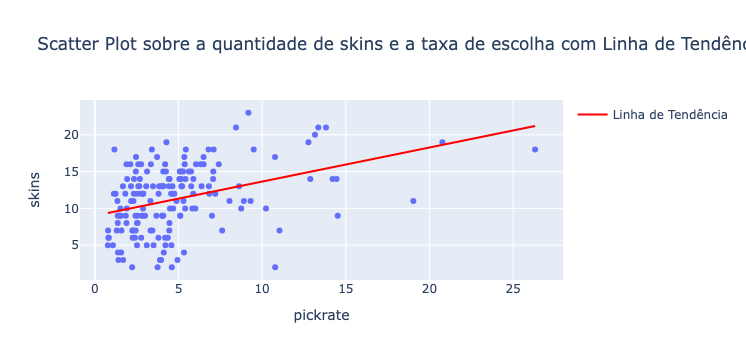

In [295]:
# Criando o scatter plot com plotly.express
fig = px.scatter(df_limpo, x="pickrate", y="skins", title='Scatter Plot sobre a quantidade de skins e a taxa de escolha com Linha de Tendência')

# Calculando a linha de regressão
x = df_limpo["pickrate"]
y = df_limpo["skins"]
coef = np.polyfit(x, y, 1)  # Ajuste linear (1º grau)
linha_tendencia = np.poly1d(coef)

# Criando os valores da linha de tendência
x_vals = np.linspace(x.min(), x.max(), 100)
y_vals = linha_tendencia(x_vals)

# Adicionando a linha de tendência ao gráfico
fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Linha de Tendência', line=dict(color='red')))

# Exibindo o gráfico
fig.show()

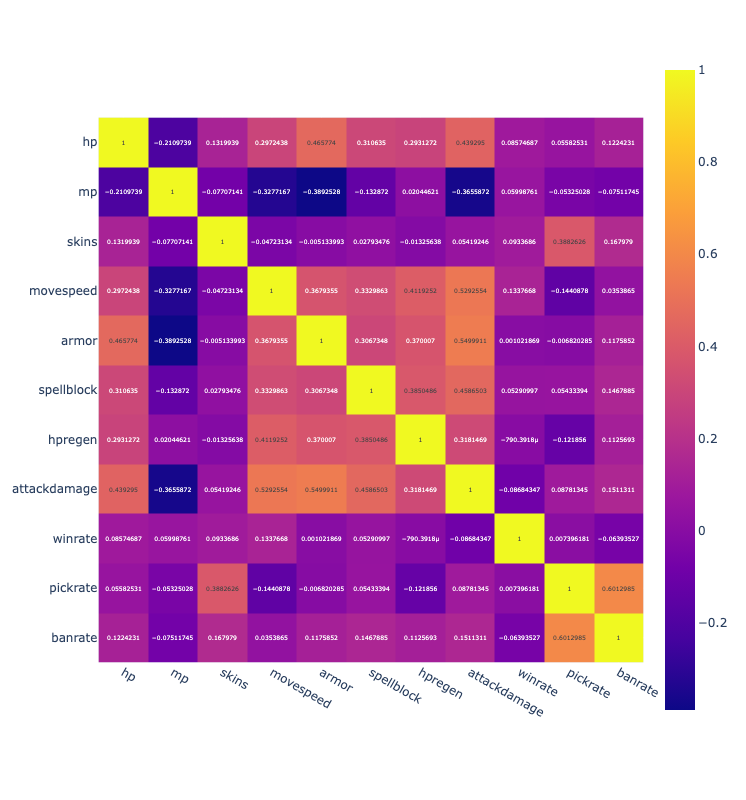

In [299]:
fig = px.imshow(df_limpo[["hp", "mp", "skins", "movespeed", "armor", "spellblock", "hpregen", "attackdamage", "winrate", "pickrate", "banrate"]].corr(),
                text_auto=True,
                width=800,
                height=800)
fig.show()

## Normalização das colunas

In [139]:
df_norm = df_limpo[["hp", "mp", "movespeed", "armor", "spellblock", "hpregen", "attackdamage", "winrate", "pickrate", "banrate"]]
scaler = StandardScaler()
ajuste = scaler.fit(df_norm)
df_norm = pd.DataFrame(scaler.transform(df_norm))
df_norm.head()

0         1         2         3         4         5         6  \
0 -1.491546  0.862159 -0.167766 -1.737373 -0.455488 -0.287347 -1.589190   
1  1.317190  0.134709 -0.167766 -0.620355 -5.192558 -0.809514 -1.589190   
2 -0.572323  0.713363  0.548206 -1.258651 -0.455488 -0.287347 -0.698696   
3  1.189520 -1.766580  1.980152  1.294532  0.728780  1.279155  1.260392   
4 -0.725527  0.862159 -0.883739 -1.418225 -0.455488 -1.853848 -1.054894   

          7         8         9  
0  0.088764 -0.987356 -0.749487  
1  0.843295 -0.647072 -0.700194  
2  0.779352  0.049323  0.448154  
3  1.674558 -0.557384 -0.612562  
4  0.370115  2.175438  0.285669

In [141]:
df_limpo[["hp", "mp", "movespeed", "armor", "spellblock", "hpregen", "attackdamage", "winrate", "pickrate", "banrate"]].head()

hp   mp  movespeed  armor  spellblock  hpregen  attackdamage  winrate  \
0  560  418        335     19          30        6            50    50.30   
1  670  330        335     26          22        5            50    51.48   
2  596  400        340     22          30        6            55    51.38   
3  665  100        350     38          32        9            66    52.78   
4  590  418        330     21          30        3            53    50.74   

   pickrate  banrate  
0      1.17     0.32  
1      2.46     0.59  
2      5.10     6.88  
3      2.80     1.07  
4     13.16     5.99

## Distribuicao amostral

In [396]:
intevalo = list(range(0,169))
mediasattack = []
mediasarmor = []
mediaswinrate = []
for i in range(3):
    mediasattack1 = []
    mediasarmor1 = []
    mediaswinrate1 = []
    for j in range(100):

        if(i==0):
            amostra_aleatoria = random.sample(intervalo,16)
        elif(i==1):
            amostra_aleatoria = random.sample(intervalo,32)
        else:
            amostra_aleatoria = random.sample(intervalo,48)
        
        df_amostra = df_limpo.iloc[amostra_aleatoria].copy()
        
        mediasattack1.append(df_amostra["attackdamage"].mean())
        mediasarmor1.append(df_amostra["armor"].mean())
        mediaswinrate1.append(df_amostra["winrate"].mean())
    
    mediasattack.append(np.array(mediasattack1))
    mediasarmor.append(np.array(mediasarmor1))
    mediaswinrate.append(np.array(mediaswinrate1))

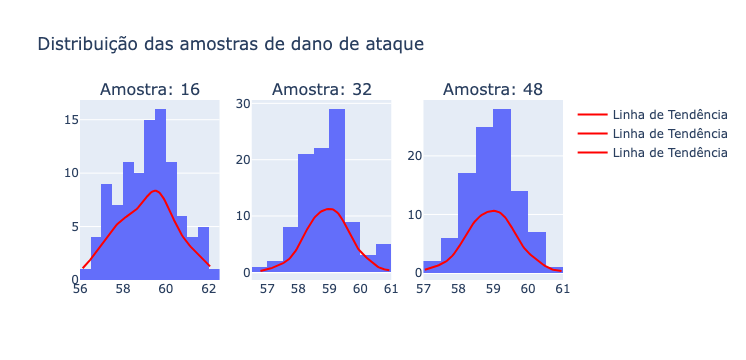

In [386]:
#histograma 1
fig1 = px.histogram(x=mediasattack[0], nbins=20)

x_vals = np.linspace(mediasattack[0].min(), mediasattack[0].max(), 100)
densidade = stats.gaussian_kde(mediasattack[0])
y_vals = densidade(x_vals)

bin_width = (mediasattack[0].max() - mediasattack[0].min()) / 20  
y_vals = y_vals * len(mediasattack[0]) * bin_width


fig1.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Linha de Tendência', line=dict(color='red')))

#histograma 2

fig2 = px.histogram(x=mediasattack[1], nbins=20)

x_vals = np.linspace(mediasattack[1].min(), mediasattack[1].max(), 100)
densidade = stats.gaussian_kde(mediasattack[2])
y_vals = densidade(x_vals)

bin_width = (mediasattack[1].max() - mediasattack[1].min()) / 20  
y_vals = y_vals * len(mediasattack[1]) * bin_width


fig2.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Linha de Tendência', line=dict(color='red')))

#histograma 3

fig3 = px.histogram(x=mediasattack[2], nbins=20)

x_vals = np.linspace(mediasattack[2].min(), mediasattack[2].max(), 100)
densidade = stats.gaussian_kde(mediasattack[2])
y_vals = densidade(x_vals)

bin_width = (mediasattack[2].max() - mediasattack[2].min()) / 20  
y_vals = y_vals * len(mediasattack[2]) * bin_width

fig3.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Linha de Tendência', line=dict(color='red')))

#figura

fig = make_subplots(rows=1, cols=3, subplot_titles=["Amostra: 16", "Amostra: 32", "Amostra: 48"])
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig1.data[1], row=1, col=1) 
fig.add_trace(fig2.data[0], row=1, col=2)  
fig.add_trace(fig2.data[1], row=1, col=2) 
fig.add_trace(fig3.data[0], row=1, col=3)
fig.add_trace(fig3.data[1], row=1, col=3)

fig.update_layout(title_text="Distribuição das amostras de dano de ataque")
fig.show()

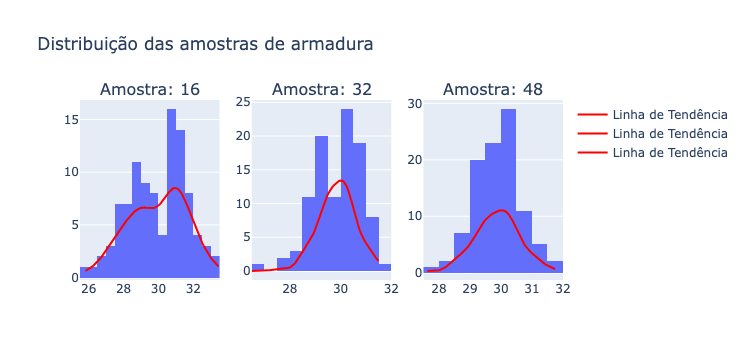

In [388]:
#histograma 1
fig1 = px.histogram(x=mediasarmor[0], nbins=20)

x_vals = np.linspace(mediasarmor[0].min(), mediasarmor[0].max(), 100)
densidade = stats.gaussian_kde(mediasarmor[0])
y_vals = densidade(x_vals)

bin_width = (mediasarmor[0].max() - mediasarmor[0].min()) / 20  
y_vals = y_vals * len(mediasarmor[0]) * bin_width


fig1.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Linha de Tendência', line=dict(color='red')))

#histograma 2

fig2 = px.histogram(x=mediasarmor[1], nbins=20)

x_vals = np.linspace(mediasarmor[1].min(), mediasarmor[1].max(), 100)
densidade = stats.gaussian_kde(mediasarmor[2])
y_vals = densidade(x_vals)

bin_width = (mediasarmor[1].max() - mediasarmor[1].min()) / 20  
y_vals = y_vals * len(mediasarmor[1]) * bin_width


fig2.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Linha de Tendência', line=dict(color='red')))

#histograma 3

fig3 = px.histogram(x=mediasarmor[2], nbins=20)

x_vals = np.linspace(mediasarmor[2].min(), mediasarmor[2].max(), 100)
densidade = stats.gaussian_kde(mediasarmor[2])
y_vals = densidade(x_vals)

bin_width = (mediasarmor[2].max() - mediasarmor[2].min()) / 20  
y_vals = y_vals * len(mediasarmor[2]) * bin_width

fig3.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Linha de Tendência', line=dict(color='red')))

#figura

fig = make_subplots(rows=1, cols=3, subplot_titles=["Amostra: 16", "Amostra: 32", "Amostra: 48"])
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig1.data[1], row=1, col=1) 
fig.add_trace(fig2.data[0], row=1, col=2)  
fig.add_trace(fig2.data[1], row=1, col=2) 
fig.add_trace(fig3.data[0], row=1, col=3)
fig.add_trace(fig3.data[1], row=1, col=3)

fig.update_layout(title_text="Distribuição das amostras de armadura")
fig.show()

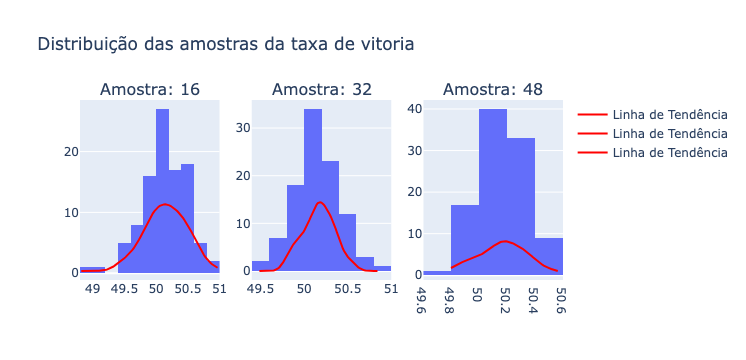

In [390]:
#histograma 1
fig1 = px.histogram(x=mediaswinrate[0], nbins=20)

x_vals = np.linspace(mediaswinrate[0].min(), mediaswinrate[0].max(), 100)
densidade = stats.gaussian_kde(mediaswinrate[0])
y_vals = densidade(x_vals)

bin_width = (mediaswinrate[0].max() - mediaswinrate[0].min()) / 20  
y_vals = y_vals * len(mediaswinrate[0]) * bin_width


fig1.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Linha de Tendência', line=dict(color='red')))

#histograma 2

fig2 = px.histogram(x=mediaswinrate[1], nbins=20)

x_vals = np.linspace(mediaswinrate[1].min(), mediaswinrate[1].max(), 100)
densidade = stats.gaussian_kde(mediaswinrate[2])
y_vals = densidade(x_vals)

bin_width = (mediaswinrate[1].max() - mediaswinrate[1].min()) / 20  
y_vals = y_vals * len(mediasattack[1]) * bin_width


fig2.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Linha de Tendência', line=dict(color='red')))

#histograma 3

fig3 = px.histogram(x=mediaswinrate[2], nbins=20)

x_vals = np.linspace(mediaswinrate[2].min(), mediaswinrate[2].max(), 100)
densidade = stats.gaussian_kde(mediaswinrate[2])
y_vals = densidade(x_vals)

bin_width = (mediaswinrate[2].max() - mediaswinrate[2].min()) / 20  
y_vals = y_vals * len(mediaswinrate[2]) * bin_width

fig3.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Linha de Tendência', line=dict(color='red')))

#figura

fig = make_subplots(rows=1, cols=3, subplot_titles=["Amostra: 16", "Amostra: 32", "Amostra: 48"])
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig1.data[1], row=1, col=1) 
fig.add_trace(fig2.data[0], row=1, col=2)  
fig.add_trace(fig2.data[1], row=1, col=2) 
fig.add_trace(fig3.data[0], row=1, col=3)
fig.add_trace(fig3.data[1], row=1, col=3)

fig.update_layout(title_text="Distribuição das amostras da taxa de vitoria")
fig.show()

## Intervalos de confiança

In [424]:
amostra_aleatoria = random.sample(intervalo,64)
df_confianca = df_limpo.loc[amostra_aleatoria]["hp"].copy() #antes devem ser definidos quem é o df

media = df_confianca.mean()
desvio_padrao = df_confianca.std()
num = len(df_confianca)

z_90 = stats.norm.ppf(1 - (1 - 0.9) / 2)
z_95 = stats.norm.ppf(1 - (1 - 0.95) / 2)

erro_padrao = desvio_padrao / np.sqrt(num)

IC_90 = (media - z_90 * erro_padrao, media + z_90 * erro_padrao)
IC_95 = (media - z_95 * erro_padrao, media + z_95 * erro_padrao)

print(f"Média da amostra: {media:.2f} ")
print(f"Desvio padrão da amostra: {desvio_padrao:.2f} ")
print(f"Intervalo de Confiança de 90%: {IC_90[0]:.2f} a {IC_90[1]:.2f}")
print(f"Intervalo de Confiança de 95%: {IC_95[0]:.2f} a {IC_95[1]:.2f}")

Média da amostra: 621.80 
Desvio padrão da amostra: 42.34 
Intervalo de Confiança de 90%: 613.09 a 630.50
Intervalo de Confiança de 95%: 611.42 a 632.17


In [426]:
amostra_aleatoria = random.sample(intervalo,64)
df_confianca = df_limpo.loc[amostra_aleatoria]["banrate"].copy()

media = df_confianca.mean()
desvio_padrao = df_confianca.std()
num = len(df_confianca)

z_90 = stats.norm.ppf(1 - (1 - 0.9) / 2)
z_95 = stats.norm.ppf(1 - (1 - 0.95) / 2)

erro_padrao = desvio_padrao / np.sqrt(num)

margem_erro = erro_padrao * z_valor

IC_90 = (media - z_90 * erro_padrao, media + z_90 * erro_padrao)
IC_95 = (media - z_95 * erro_padrao, media+ z_95 * erro_padrao)

print(f"Média da amostra: {media:.2f} ")
print(f"Desvio padrão da amostra: {desvio_padrao:.2f} ")
print(f"Intervalo de Confiança de 90%: {IC_90[0]:.2f} a {IC_90[1]:.2f}")
print(f"Intervalo de Confiança de 95%: {IC_95[0]:.2f} a {IC_95[1]:.2f}")

Média da amostra: 4.30 
Desvio padrão da amostra: 5.87 
Intervalo de Confiança de 90%: 3.10 a 5.51
Intervalo de Confiança de 95%: 2.86 a 5.74
